In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [241]:
image = cv2.imread("./expression3.jpg")
image = cv2.resize(image, (500, 300))

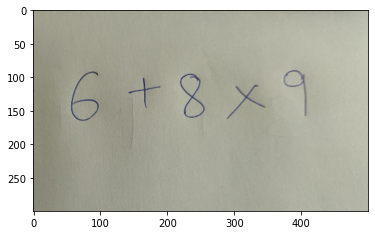

In [242]:
plt.imshow(image[...,[2,1,0]])
plt.show()

In [243]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

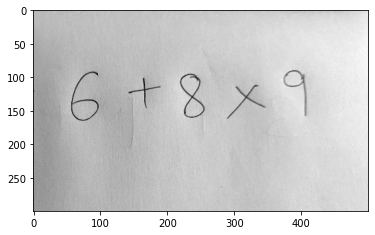

In [244]:
plt.imshow(gray_image, cmap="gray")
plt.show()

In [263]:
gray_image = cv2.morphologyEx(gray_image, cv2.MORPH_ERODE, np.ones((3,3)))

In [264]:
edge_image = cv2.Canny(gray_image, 10, 100)

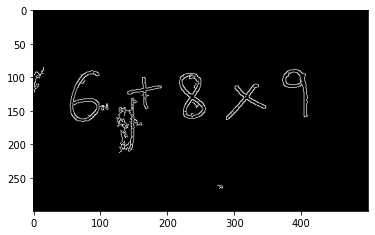

In [265]:
plt.imshow(edge_image, cmap="gray")
plt.show()

In [266]:
contours, _ = cv2.findContours(edge_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [267]:
import numpy as np

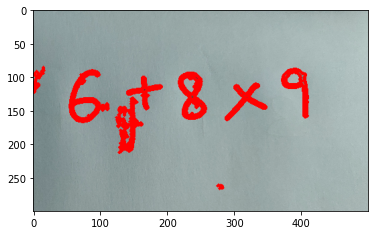

In [268]:
plt.imshow(cv2.drawContours(np.copy(image), contours, -1, (255,0,0), 3))
plt.show()

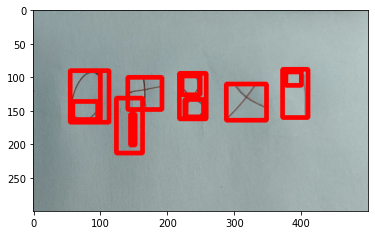

In [269]:
dr_im = np.copy(image)
for contour in contours:
    area = cv2.contourArea(contour)
    if area < 130:
        continue
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(dr_im, (x, y), (x+w, y+h), (255,0,0), 5)

plt.imshow(dr_im)
plt.show()
    

In [270]:
 ret, thresh = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

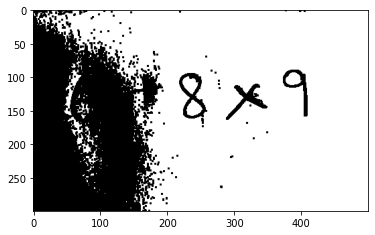

In [271]:
plt.imshow(thresh, cmap="gray")
plt.show()

In [272]:
thresh = cv2.adaptiveThreshold(cv2.GaussianBlur(gray_image, (5,5), 5/6), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 10)

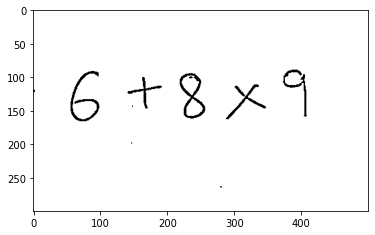

In [273]:
plt.imshow(thresh, cmap="gray")
plt.show()

In [274]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# contours, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

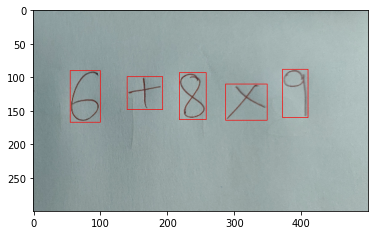

In [275]:
dr_im = np.copy(image)
rectangle = []
for contour, hier in zip(contours[1:], hierarchy[0][1:]):
    area = cv2.contourArea(contour)
    # if area < 150:
    #     continue
    
    if area < 150 or hier[3] > 0: # Means Parent the Top Level Contour or Not
        continue
    x, y, w, h = cv2.boundingRect(contour)
    rectangle.append((x,y,w,h))
    cv2.rectangle(dr_im, (x, y), (x+w, y+h), (255,0,0), 1)

plt.imshow(dr_im)
plt.show()

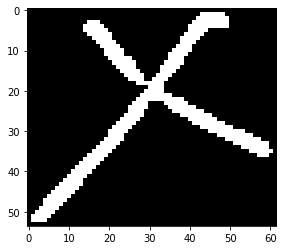

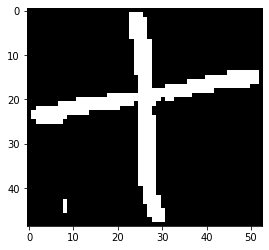

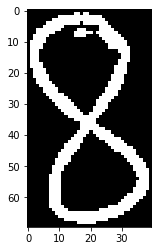

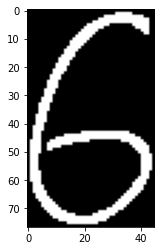

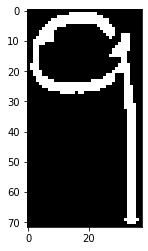

In [276]:
images = []
for i, rect in enumerate(rectangle):
    x, y, w, h = rect
    cv2.imwrite("./Expression/%d.jpg" % i, (thresh[y:y+h, x:x+w] != 255).astype("uint8")*255)
    im = (thresh[y:y+h, x:x+w] != 255).astype("uint8")
    images.append(im)
    plt.imshow(im, cmap="gray")
    plt.show()

In [277]:
from Preprocess import preprocess
from keras.models import load_model
import json

classes = json.load(open("./classes.json", "r"))

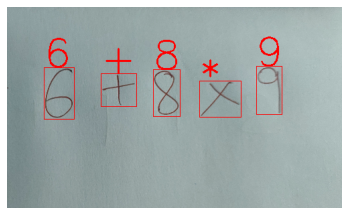

In [278]:
dr_im = np.copy(image)
model = load_model("./Model.h5")
for rect, img in zip(rectangle, images):
    x, y, w, h = rect
    
    pp_im = preprocess(img)
    # plt.imshow(img, cmap="gray")
    # plt.show()
    pp_im = pp_im.reshape(-1, 45, 45, 1)

    pred = model.predict(pp_im)
    cls = classes[str(np.argmax(pred))]

    cv2.putText(dr_im, cls, (x,y-1), 0, 2, (255, 0, 0), 2)
    cv2.rectangle(dr_im, (x, y), (x+w, y+h), (255,0,0), 1)

plt.imshow(dr_im)
plt.axis("off")
# plt.savefig(str(np.random.randint(6)) + ".jpg")
plt.show()